In [36]:
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
X, y =load_diabetes(return_X_y = True)
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
print("Coefficient",lr.coef_)
print("Intercept: ",lr.intercept_)

Coefficient [ -17.00486127 -211.25912836  519.76899353  321.84094964 -963.74783152
  591.17784813  190.64319129  224.29473227  847.61443918   56.65203509]
Intercept:  152.14035823776197


In [9]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 Score: ",r2_score(y_test,lr.predict(X_test)))
print("Mean Squared Error",np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))

R2 Score:  0.5912761564015607
Mean Squared Error 47.583342335764954


In [23]:
from sklearn.linear_model import Ridge
rgd = Ridge(alpha=100000)

In [24]:
rgd.fit(X_train,y_train)

Ridge(alpha=100000)

In [25]:
print(rgd.coef_)
print(rgd.intercept_)

[ 0.00272442  0.00122189  0.00722081  0.00560743  0.00263678  0.00208734
 -0.00492123  0.00557929  0.0071718   0.00511023]
152.0311755420322


In [26]:
y_pred = rgd.predict(X_test)

In [27]:
print("R2 Score:",r2_score(y_test,y_pred))
print("Mean Squared error",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score: -2.078166324759323e-05
Mean Squared error 74.42939179179497


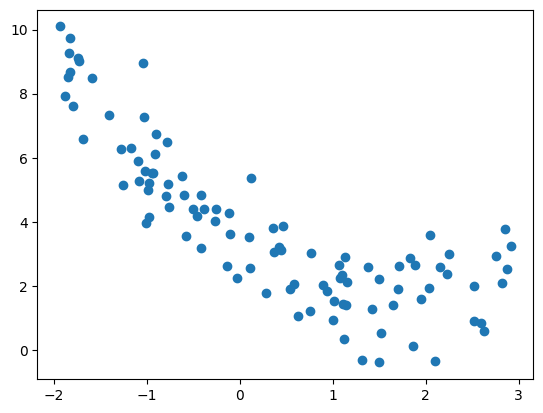

In [31]:
m=100
x1 = 5 * np.random.rand( m,1 ) -2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn( m,1 )
plt.scatter(x1,x2)
plt.show() 


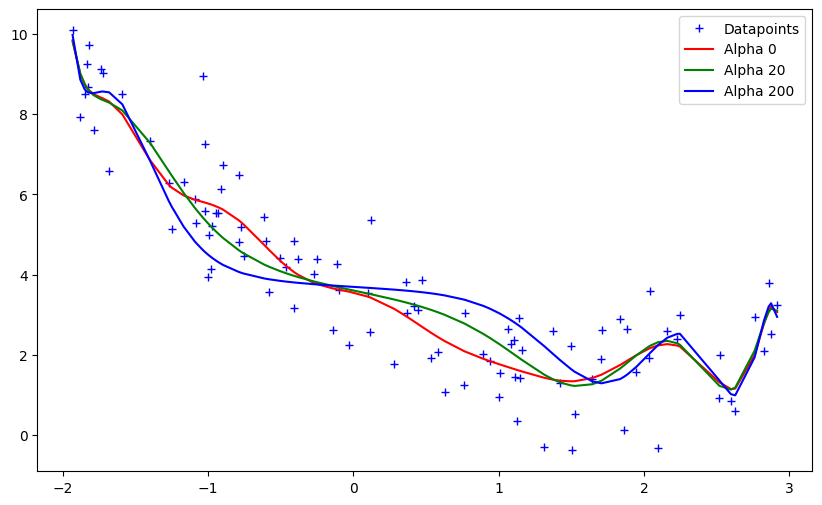

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
    model = Pipeline([
        ('poly_feats ',PolynomialFeatures(degree=16)),
        ('ridge reg',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas =[0,20,200]
c = ['r','g','b']

plt.figure(figsize = (10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha, c in zip(alphas,c):
    preds = get_preds_ridge(x1,x2,alpha=alpha)
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])], c=c,label='Alpha {}'.format(alpha))
plt.legend()
plt.show()
